<a href="https://colab.research.google.com/github/yeonghun00/stock_public/blob/main/statistical_arbitrage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime

In [2]:
def get_related(code:str='005930'):
  url = 'https://finance.naver.com/item/main.nhn?code=' + code
  result = requests.get(url, headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
  bs_obj = BeautifulSoup(result.content, "html.parser")
  th = bs_obj.find_all("th", {'scope':"col"})
  th = [x.get_text() for x in th][-12:-7]
  elements = [x[-6:] for x in th]
  return elements

get_related()

['005930', '000660', '357780', '240810', '058470']

In [3]:
class Stock:
  def __init__(self, code):
    self.code = code
    self.headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}

  def get_price(self, days:int=100):
    url = 'https://fchart.stock.naver.com/sise.nhn?symbol=' + str(self.code) + '&timeframe=day&count='+ str(days) + '&requestType=0'
    result = requests.get(url, headers = self.headers)
    bs_obj = BeautifulSoup(result.content, "html.parser")
    items = bs_obj.find_all("item")

    data = np.array([item['data'].split('|') for item in items], int)

    d = {'Date':list(map(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'), np.array(data)[:,0])), \
     'Open':data[:,1], 'High':data[:,2], 'Low':data[:,3], 'Close':data[:,4], 'Volume':data[:,5]}

    df = pd.DataFrame(data=d,)
    df = df.set_index('Date')
    return df 

In [4]:
# codes = get_related('035420')
# codes = ['226490','229200'] kospi & kosdaq ==> 의미없음

# codes = ['138920', '500013', '137610'] ==> 의미있음: 콩선물, 옥수수, 농산물


codes = ['138920', '500013', '137610']

In [5]:
dic = {}
days = 100

for i in codes:
  stock = Stock(i)
  dic[i] = stock.get_price(days)
  print()

In [6]:
valid = days
for i in codes:
  if (len(dic[i]['Close']) != valid):
    codes.remove(i)

In [7]:
def norm(x):
  norm = np.linalg.norm(x)
  return np.round(x/norm, 16)

In [8]:
norm_dic = {}

for i in codes:
  norm_dic[i] = norm(dic[i]['Close'])

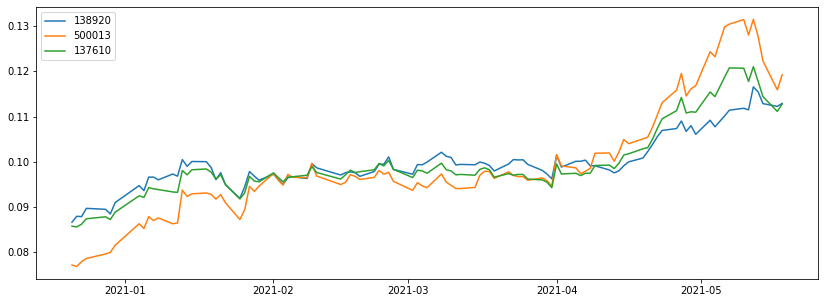

In [9]:
from matplotlib import pyplot as plt

plt.subplots(figsize=(14, 5))
for i in codes:
  plt.plot(norm_dic[i])

plt.legend(codes)
plt.show()

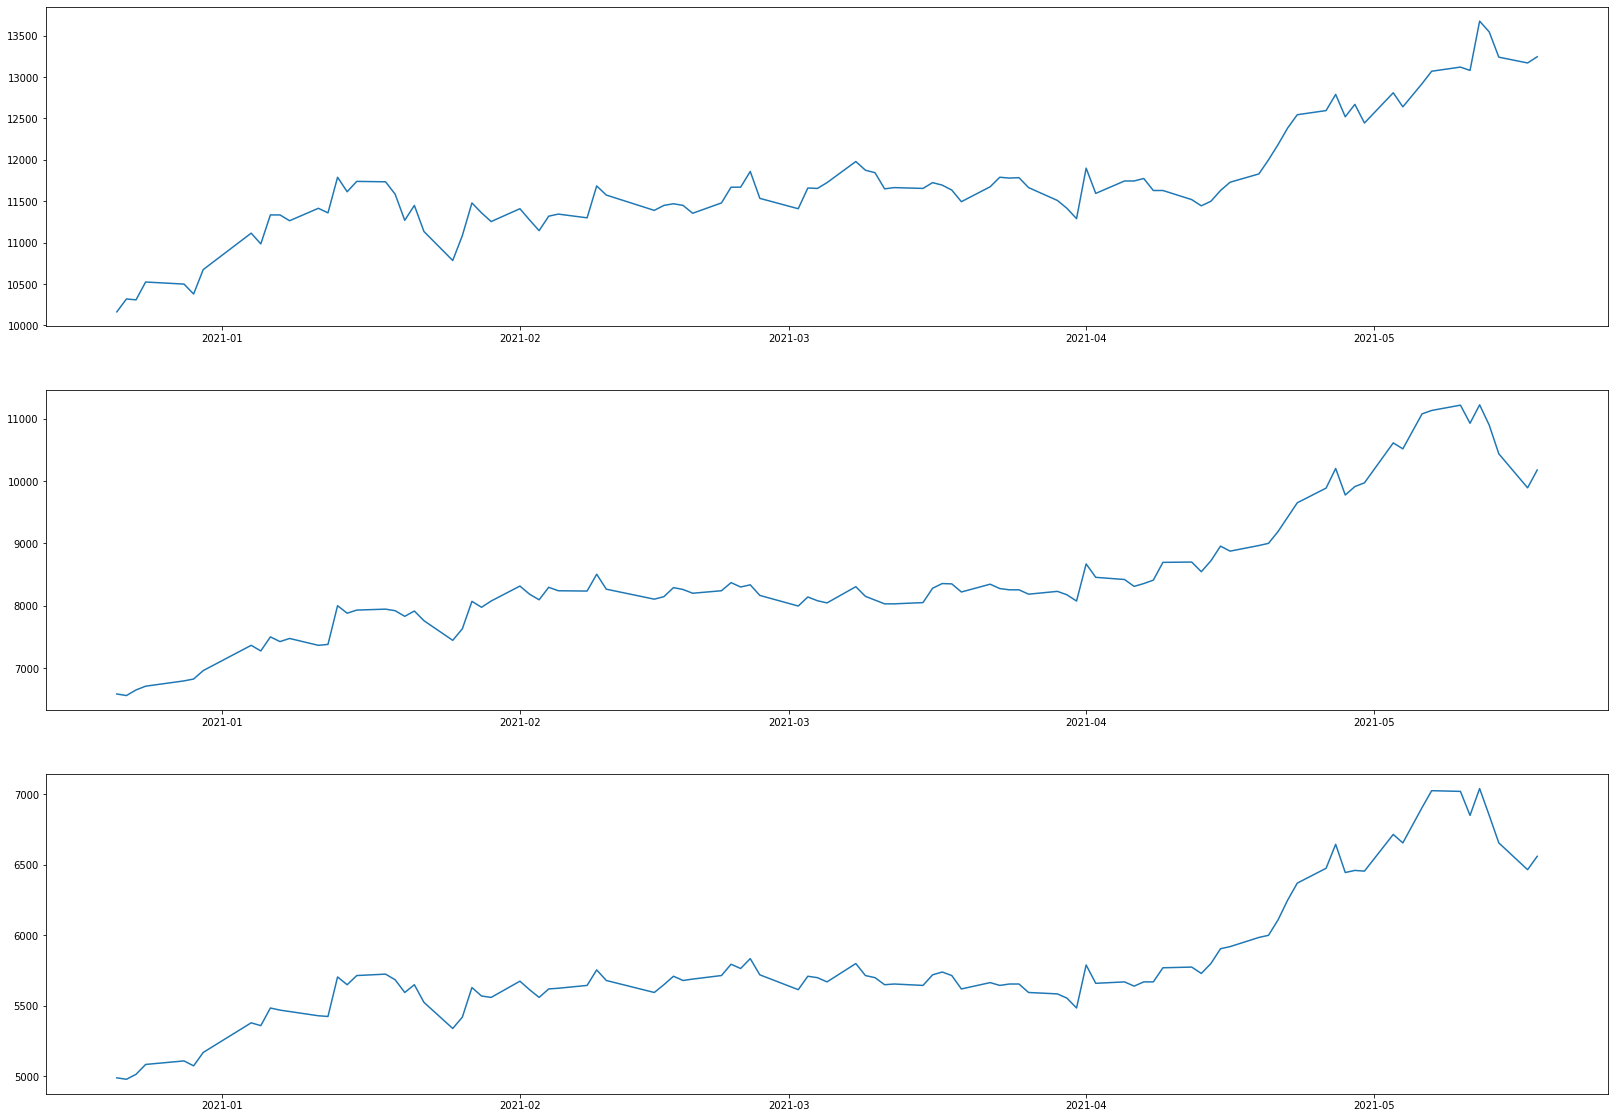

In [10]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(len(codes), figsize=(28,20))
for i in range(0,len(codes)):
  axs[i].plot(dic[codes[i]]['Close'][:100])
plt.show()